In [1]:
model = "RL_performance"

/Users/YiSangHyun/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


(0.6452912440993948, 0.00011800180720245444)


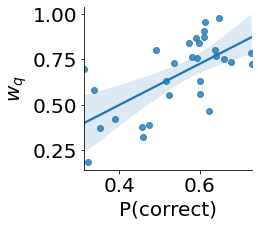

In [2]:
# Supplementary Fig. 5

import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

model_based_var =json.load(open(f'../model_fitting/model_based_var/model_based_generated_var_{model}_avg_aff_score_precise_rt.json', 'r'))


subj_idx_lists = []
wc_lists = []
cong_resp_lists = []
rt_lists = []
high_chosen_lists = []
def txt2code(txt):
    if txt == 'Pinch':
        return 1
    elif txt == 'Clench':
        return 2
    else:
        return 3

for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    pWinOfMov = subj_i_data['pWinOfMov']
    
    b4 = subj_i_data['gen_params'][4]
    wc = b4
    rt_lists += subj_i_data['rt']
    aff = [txt2code(x.split('/')[-2]) for x in subj_i_data['shownStim']]
    resp = subj_i_data['response_list']
    cong_resp_lists += [x==resp[i] for i, x in enumerate(aff)]
    high_chosen_lists += [np.argmax(x)==(resp[i]-1) for i, x in enumerate(pWinOfMov)]
    wc_list = subj_i_data['wc_list']
    wc_lists += wc_list
    for j in range(len(resp)):
        subj_idx_lists.append(i)

d = {'wr': wc_lists, 'subject index': subj_idx_lists, 'rt': rt_lists, 'cong resp':cong_resp_lists, 'correct resp':high_chosen_lists}
d = pd.DataFrame(data=d)


d2 = d.groupby(['subject index'], as_index=False)['wr', 'correct resp'].mean()

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 3,3

sns.regplot(data=d2, x='correct resp', y='wr')
plt.xlabel("P(correct)", fontsize=20)
plt.ylabel("$w_q$", fontsize=20)
plt.tick_params(labelsize=20)
sns.despine()

from scipy import stats
print(stats.pearsonr(d2['correct resp'], d2['wr']))

plt.savefig('/Users/YiSangHyun/Downloads/w_vs_p_correct.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


No handles with labels found to put in legend.


    subject index shown condition        wr
0               0            high  0.914743
1               0             low  0.896379
2               1            high  0.805019
3               1             low  0.726011
4               2            high  0.427118
5               2             low  0.347552
6               3            high  0.274195
7               3             low  0.085250
8               4            high  0.664921
9               4             low  0.442776
10              5            high  0.757641
11              5             low  0.849683
12              6            high  0.398749
13              6             low  0.437260
14              7            high  0.368859
15              7             low  0.367452
16              8            high  0.841291
17              8             low  0.842922
18              9            high  0.661312
19              9             low  0.596378
20             10            high  0.797973
21             10             lo

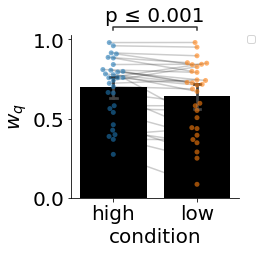

In [3]:
# Supplementary Fig. 5

import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

model_based_var =json.load(open(f'../model_fitting/model_based_var/model_based_generated_var_{model}_avg_aff_score_precise_rt.json', 'r'))


reward_lists = []
rpe_q_lists = []
shown_cond_lists = []
subj_idx_lists = []
wc_lists = []
for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    correct_response_list = [np.argmax(p)+1 for p in subj_i_data['pWinOfMov']]
    response_list = subj_i_data['response_list']
    reward_list = subj_i_data["reward_list"]
    shown_cond_list = [cond.split(' ')[1] for cond in subj_i_data["shownCond"]]
    subj_idx_list = [subj_i_data['workerID']] * len(reward_list)
    xi_q_list = subj_i_data['xi_q_list']
    xi_aff_list = subj_i_data['xi_aff_list']
    wc_list = subj_i_data['wc_list']
    
    wc_lists_temp = []
    for j in range(len(response_list)):
        reward_lists.append(reward_list[j])
        shown_cond_lists.append(shown_cond_list[j])
        subj_idx_lists.append(i)
        
        wc_lists_temp.append(wc_list[j])
        

    wc_lists_temp = [float(x) for x in wc_lists_temp]
    wc_lists += wc_lists_temp
    

d = {'wr': wc_lists, 'reward': reward_lists, 'shown condition': shown_cond_lists, 'subject index': subj_idx_lists}
d = pd.DataFrame(data=d)
d = d.groupby(['subject index', 'shown condition'], as_index=False)['wr'].mean()
print(d)

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 3,3

o = ["congruent high", "incongruent high", "congruent low", "incongruent low"]
o = ["high", "low"]
ax = sns.barplot(data=d, x="shown condition", y="wr", facecolor=(0, 0, 0), order=o, capsize=0.08)
ax = sns.swarmplot(data=d, x="shown condition", y="wr", order=o, alpha=0.6)


#============================================================
locs1 = ax.get_children()[0].get_offsets()
locs2 = ax.get_children()[1].get_offsets()
sort_idxs1 = np.argsort(d[d['shown condition']=='high']['wr'])
sort_idxs2 = np.argsort(d[d['shown condition']=='low']['wr'])

locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="black", alpha=0.2)
#============================================================

test_results = add_stat_annotation(ax, data=d, x="shown condition", y="wr", order=o,
                               box_pairs=[("high", "low")],
                               test='t-test_paired', text_format='simple',
                               loc='outside', comparisons_correction=None, verbose=4, fontsize=20)

plt.xlabel("condition",fontsize=20)
plt.ylabel(r'$w_q$',fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

plt.savefig('/Users/YiSangHyun/Downloads/w_by_cong_incong.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

      subject index  trial index   shown condition          wr
0                 0            0    congruent high   20.000000
1                 0            0     congruent low   20.000000
2                 0            0  incongruent high   20.000000
3                 0            0   incongruent low   20.000000
4                 0            1    congruent high   16.666667
...             ...          ...               ...         ...
2513             29           19   incongruent low   65.000000
2514             29           20    congruent high   85.000000
2515             29           20     congruent low   75.000000
2516             29           20  incongruent high  100.000000
2517             29           20   incongruent low   60.000000

[2518 rows x 4 columns]


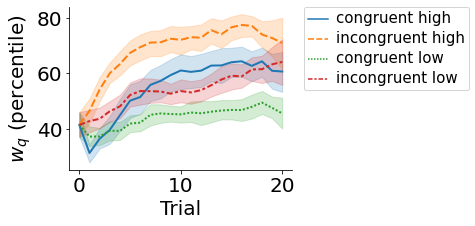

In [4]:
# Supplementary Fig. 5

import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

model_based_var =json.load(open(f'../model_fitting/model_based_var/model_based_generated_var_{model}_avg_aff_score_precise_rt.json', 'r'))


def stim2code(stim):
    if "Pinch" in stim:
        return 1
    elif "Clench" in stim:
        return 2
    elif "Poke" in stim:
        return 3
    else:
        return 4
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return code_list


reward_lists = []
rpe_q_lists = []
shown_cond_lists = []
subj_idx_lists = []
wc_lists = []
rt_lists = []
aff_chosen_lists = []
correct_chosen_lists = []
trial_index_lists = []
for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    shownStim_list = np.array(stim_array2code(subj_i_data['shownStim']))
    correct_response_list = np.array([np.argmax(p)+1 for p in subj_i_data['pWinOfMov']])
    response_list = np.array(subj_i_data['response_list'])
    correct_chosen = (correct_response_list == response_list).tolist()
    aff_chosen = (shownStim_list == response_list).tolist()
    reward_list = subj_i_data["reward_list"]
    shown_cond_list = [cond for cond in subj_i_data["shownCond"]]
    subj_idx_list = [subj_i_data['workerID']] * len(reward_list)
    xi_q_list = subj_i_data['xi_q_list']
    xi_aff_list = subj_i_data['xi_aff_list']
    wc_list = subj_i_data['wc_list']
    rts = subj_i_data['rt']
    trial_index_lists += subj_i_data['trial_index']

    rt_lists_temp = []
    wc_lists_temp = []
    for j in range(len(response_list)):
        reward_lists.append(reward_list[j])
        shown_cond_lists.append(shown_cond_list[j])
        subj_idx_lists.append(i)
        
        wc_lists_temp.append(wc_list[j])
        rt_lists_temp.append(rts[j])
        
        aff_chosen_lists.append(aff_chosen[j])
        correct_chosen_lists.append(correct_chosen[j])
        
    rt_lists += rt_lists_temp

    wc_lists_temp = [float(x) for x in wc_lists_temp]
    wc_lists_temp = np.vectorize(lambda x: percentileofscore(wc_lists_temp, x))(wc_lists_temp)
    wc_lists_temp = [math.ceil(x/10)*10 for x in wc_lists_temp.tolist()]
    wc_lists += wc_lists_temp

d = {'trial index': trial_index_lists, 'wr': wc_lists, 'reward': reward_lists, 'shown condition': shown_cond_lists, 'p(affordance)':aff_chosen_lists,
     'p(correct)':correct_chosen_lists, 'rt':rt_lists, 'subject index': subj_idx_lists}
d = pd.DataFrame(data=d)

d = d.groupby(['subject index', 'trial index','shown condition'], as_index=False)['wr'].mean()
print(d)

o = ["congruent high","incongruent high", "congruent low", "incongruent low"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="wr", ci=95, hue="shown condition", hue_order=o, style="shown condition", style_order=o,
                 legend = True, linewidth = 2)


plt.xlabel('Trial',fontsize=20)
plt.ylabel(r'$w_q$ (percentile)',fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/wr_affordance_choice.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()



      subject index  trial index   shown condition     wr
0                 6            0    congruent high   20.0
1                 6            0     congruent low   20.0
2                 6            0  incongruent high   20.0
3                 6            0   incongruent low   20.0
4                 6            1    congruent high   30.0
...             ...          ...               ...    ...
2513             37           19   incongruent low   60.0
2514             37           20    congruent high   85.0
2515             37           20     congruent low   75.0
2516             37           20  incongruent high  100.0
2517             37           20   incongruent low   55.0

[2518 rows x 4 columns]


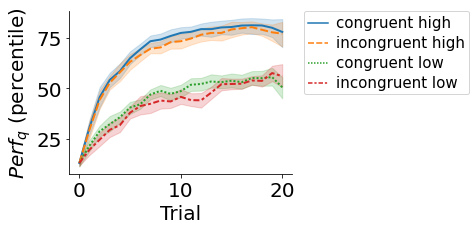

In [5]:
# Supplementary Fig. 5

import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

model_based_var =json.load(open(f'../model_fitting/model_based_var/model_based_generated_var_{model}_avg_aff_score_precise_rt.json', 'r'))


def stim2code(stim):
    if "Pinch" in stim:
        return 1
    elif "Clench" in stim:
        return 2
    elif "Poke" in stim:
        return 3
    else:
        return 4
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return code_list


reward_lists = []
rpe_q_lists = []
shown_cond_lists = []
subj_idx_lists = []
wc_lists = []
rt_lists = []
aff_chosen_lists = []
correct_chosen_lists = []
trial_index_lists = []
for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    shownStim_list = np.array(stim_array2code(subj_i_data['shownStim']))
    correct_response_list = np.array([np.argmax(p)+1 for p in subj_i_data['pWinOfMov']])
    response_list = np.array(subj_i_data['response_list'])
    correct_chosen = (correct_response_list == response_list).tolist()
    aff_chosen = (shownStim_list == response_list).tolist()
    reward_list = subj_i_data["reward_list"]
    shown_cond_list = [cond for cond in subj_i_data["shownCond"]]
    subj_idx_list = [subj_i_data['workerID']] * len(reward_list)
    xi_q_list = subj_i_data['xi_q_list']
    xi_aff_list = subj_i_data['xi_aff_list']
    wc_list = xi_q_list
    rts = subj_i_data['rt']
    trial_index_lists += subj_i_data['trial_index']

    rt_lists_temp = []
    wc_lists_temp = []
    for j in range(len(response_list)):
        reward_lists.append(reward_list[j])
        shown_cond_lists.append(shown_cond_list[j])
        subj_idx_lists.append(subj_i_data['workerID'])
        
        wc_lists_temp.append(wc_list[j])
        rt_lists_temp.append(rts[j])
        
        aff_chosen_lists.append(aff_chosen[j])
        correct_chosen_lists.append(correct_chosen[j])
        
    rt_lists += rt_lists_temp

    wc_lists_temp = [float(x) for x in wc_lists_temp]
    wc_lists_temp = np.vectorize(lambda x: percentileofscore(wc_lists_temp, x))(wc_lists_temp)
    wc_lists_temp = [math.ceil(x/10)*10 for x in wc_lists_temp.tolist()]
    wc_lists += wc_lists_temp

d = {'trial index': trial_index_lists, 'wr': wc_lists, 'reward': reward_lists, 'shown condition': shown_cond_lists, 'p(affordance)':aff_chosen_lists,
     'p(correct)':correct_chosen_lists, 'rt':rt_lists, 'subject index': subj_idx_lists}
d = pd.DataFrame(data=d)
#print(d)
d = d.groupby(['subject index', 'trial index','shown condition'], as_index=False)['wr'].mean()
print(d)

o = ["congruent high","incongruent high", "congruent low", "incongruent low"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="wr", ci=95, hue="shown condition", hue_order=o, style="shown condition", style_order=o,
                 legend = True, linewidth = 2)


plt.xlabel('Trial',fontsize=20)
plt.ylabel(r'$Perf_q$ (percentile)',fontsize=20)
ax.tick_params(labelsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/wr_affordance_choice.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()




      subject index  trial index   shown condition    wr
0                 6            0    congruent high  20.0
1                 6            0     congruent low  20.0
2                 6            0  incongruent high  20.0
3                 6            0   incongruent low  20.0
4                 6            1    congruent high  45.0
...             ...          ...               ...   ...
2513             37           19   incongruent low  50.0
2514             37           20    congruent high  80.0
2515             37           20     congruent low  75.0
2516             37           20  incongruent high  80.0
2517             37           20   incongruent low  45.0

[2518 rows x 4 columns]


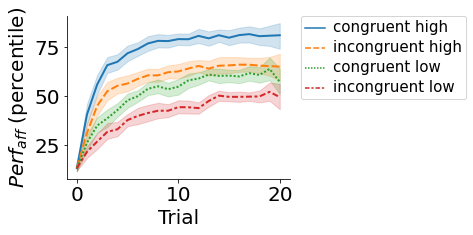

In [6]:
# Supplementary Fig. 5

import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

model_based_var =json.load(open(f'../model_fitting/model_based_var/model_based_generated_var_{model}_avg_aff_score_precise_rt.json', 'r'))


def stim2code(stim):
    if "Pinch" in stim:
        return 1
    elif "Clench" in stim:
        return 2
    elif "Poke" in stim:
        return 3
    else:
        return 4
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return code_list


reward_lists = []
rpe_q_lists = []
shown_cond_lists = []
subj_idx_lists = []
wc_lists = []
rt_lists = []
aff_chosen_lists = []
correct_chosen_lists = []
trial_index_lists = []
for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    shownStim_list = np.array(stim_array2code(subj_i_data['shownStim']))
    correct_response_list = np.array([np.argmax(p)+1 for p in subj_i_data['pWinOfMov']])
    response_list = np.array(subj_i_data['response_list'])
    correct_chosen = (correct_response_list == response_list).tolist()
    aff_chosen = (shownStim_list == response_list).tolist()
    reward_list = subj_i_data["reward_list"]
    shown_cond_list = [cond for cond in subj_i_data["shownCond"]]
    subj_idx_list = [subj_i_data['workerID']] * len(reward_list)
    xi_q_list = subj_i_data['xi_q_list']
    xi_aff_list = subj_i_data['xi_aff_list']
    wc_list = xi_aff_list
    rts = subj_i_data['rt']
    trial_index_lists += subj_i_data['trial_index']

    rt_lists_temp = []
    wc_lists_temp = []
    for j in range(len(response_list)):
        reward_lists.append(reward_list[j])
        shown_cond_lists.append(shown_cond_list[j])
        subj_idx_lists.append(subj_i_data['workerID'])
        
        wc_lists_temp.append(wc_list[j])
        rt_lists_temp.append(rts[j])
        
        aff_chosen_lists.append(aff_chosen[j])
        correct_chosen_lists.append(correct_chosen[j])
        
    rt_lists += rt_lists_temp

    wc_lists_temp = [float(x) for x in wc_lists_temp]
    wc_lists_temp = np.vectorize(lambda x: percentileofscore(wc_lists_temp, x))(wc_lists_temp)
    wc_lists_temp = [math.ceil(x/10)*10 for x in wc_lists_temp.tolist()]
    wc_lists += wc_lists_temp

d = {'trial index': trial_index_lists, 'wr': wc_lists, 'reward': reward_lists, 'shown condition': shown_cond_lists, 'p(affordance)':aff_chosen_lists,
     'p(correct)':correct_chosen_lists, 'rt':rt_lists, 'subject index': subj_idx_lists}
d = pd.DataFrame(data=d)
#print(d)
d = d.groupby(['subject index', 'trial index','shown condition'], as_index=False)['wr'].mean()
print(d)

o = ["congruent high","incongruent high", "congruent low", "incongruent low"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="trial index", y="wr", ci=95, hue="shown condition", hue_order=o, style="shown condition", style_order=o,
                 legend = True, linewidth = 2)

plt.xlabel('Trial',fontsize=20)
plt.ylabel(r'$Perf_{aff}$ (percentile)',fontsize=20)
ax.tick_params(labelsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/wr_affordance_choice.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()






       wr  reward   shown condition  p(affordance)  p(correct)        rt  \
0      20       0  incongruent high           True       False  1.512612   
1      20       0   incongruent low          False       False  0.867273   
2      20       1     congruent low          False       False  0.914339   
3      20       1    congruent high           True        True  1.097739   
4      20       0   incongruent low           True       False  1.495665   
...    ..     ...               ...            ...         ...       ...   
14330  60       1     congruent low           True        True  0.751392   
14331  70       1  incongruent high           True       False  0.787865   
14332  10       1    congruent high           True        True  0.748827   
14333  70       0   incongruent low          False        True  0.830364   
14334  70       1     congruent low           True        True  0.673280   

       subject index  
0                  6  
1                  6  
2                 

No handles with labels found to put in legend.


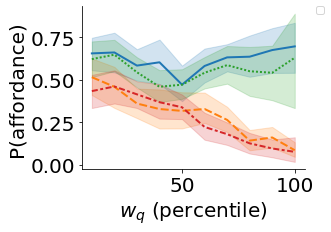

In [7]:
# Fig. 3

import json, math
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

model_based_var =json.load(open(f'../model_fitting/model_based_var/model_based_generated_var_{model}_avg_aff_score_precise_rt.json', 'r'))


def stim2code(stim):
    if "Pinch" in stim:
        return 1
    elif "Clench" in stim:
        return 2
    elif "Poke" in stim:
        return 3
    else:
        return 4
    
def stim_array2code(stim_array):
    stim_list = stim_array
    code_list = [stim2code(stim) for stim in stim_list]
    return code_list


reward_lists = []
rpe_q_lists = []
shown_cond_lists = []
subj_idx_lists = []
wc_lists = []
rt_lists = []
aff_chosen_lists = []
correct_chosen_lists = []
for i in range(len(model_based_var)):
    subj_i_data = model_based_var[i]
    shownStim_list = np.array(stim_array2code(subj_i_data['shownStim']))
    correct_response_list = np.array([np.argmax(p)+1 for p in subj_i_data['pWinOfMov']])
    response_list = np.array(subj_i_data['response_list'])
    correct_chosen = (correct_response_list == response_list).tolist()
    aff_chosen = (shownStim_list == response_list).tolist()
    reward_list = subj_i_data["reward_list"]
    shown_cond_list = [cond for cond in subj_i_data["shownCond"]]
    subj_idx_list = [subj_i_data['workerID']] * len(reward_list)
    xi_q_list = subj_i_data['xi_q_list']
    xi_aff_list = subj_i_data['xi_aff_list']
    wc_list = subj_i_data['wc_list']
    rts = subj_i_data['rt']

    rt_lists_temp = []
    wc_lists_temp = []
    for j in range(len(response_list)):
        reward_lists.append(reward_list[j])
        shown_cond_lists.append(shown_cond_list[j])
        subj_idx_lists.append(subj_i_data['workerID'])
        
        wc_lists_temp.append(wc_list[j])
        rt_lists_temp.append(rts[j])
        
        aff_chosen_lists.append(aff_chosen[j])
        correct_chosen_lists.append(correct_chosen[j])
        
    rt_lists += rt_lists_temp

    wc_lists_temp = [float(x) for x in wc_lists_temp]
    wc_lists_temp = np.vectorize(lambda x: percentileofscore(wc_lists_temp, x))(wc_lists_temp)
    wc_lists_temp = [math.ceil(x/10)*10 for x in wc_lists_temp.tolist()]
    wc_lists += wc_lists_temp

d = {'wr': wc_lists, 'reward': reward_lists, 'shown condition': shown_cond_lists, 'p(affordance)':aff_chosen_lists,
     'p(correct)':correct_chosen_lists, 'rt':rt_lists, 'subject index': subj_idx_lists}
d = pd.DataFrame(data=d)
print(d)
d = d.groupby(['subject index', 'wr','shown condition'], as_index=False)['p(affordance)'].mean()
print(d)

o = ["congruent high","incongruent high", "congruent low", "incongruent low"]

from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 4,3

ax = sns.lineplot(data=d, x="wr", y="p(affordance)", ci=95, hue="shown condition", style="shown condition", hue_order=o, style_order=o,
                 legend = False, linewidth = 2)


plt.xlabel(r'$w_q$ (percentile)',fontsize=20)
plt.ylabel('P(affordance)',fontsize=20)
ax.tick_params(labelsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/wr_affordance_choice.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
